<h2> Assess vanilla VAE and genRKM models</h2>

In [1]:
from class_Adv_attack_genRKM import Adv_attack_genRKM
import importlib
import torch
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import math

c:\Users\gcorl\OneDrive\Documents\KUL\Master 2\Master thesis\Programming\Restricted_Kernel_Machines_Demo_MNIST\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
attack_VAE = Adv_attack_genRKM('out/Mul_trained_RKM_20240423-noRob_200epo_5kN_00001LR_128hdim_noLinLay', True)
attack_genRKM = Adv_attack_genRKM('out/Mul_trained_RKM_20240423-noRob_200epo_5kN_00001LR_128hdim_noLinLay', False)

 my filename c:\Users\gcorl\AppData\Roaming\jupyter\runtime\kernel-v2-11412OL6RPUZscfdF.json


c:\Users\gcorl\OneDrive\Documents\KUL\Master 2\Master thesis\Programming\Restricted_Kernel_Machines_Demo_MNIST\myenv\lib\site-packages\torchvision\datasets\mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


Loading pretrained model LPIPS from C:\Users\gcorl\.cache\torch\hub\checkpoints\LPIPS_v0.1_alex-df73285e.pth
<class 'class_Adv_attack_genRKM.Model'>
 my filename c:\Users\gcorl\AppData\Roaming\jupyter\runtime\kernel-v2-11412OL6RPUZscfdF.json
Loading pretrained model LPIPS from C:\Users\gcorl\.cache\torch\hub\checkpoints\LPIPS_v0.1_alex-df73285e.pth
<class 'class_Adv_attack_genRKM.Model'>


In [10]:
attack_genRKM.adversarial_attack(0, 3, 0.5, 0.1, False)

'Attack succeeded'

In [11]:
print(attack_genRKM.get_ssim())

0.7842887043952942


In [5]:
print(attack_genRKM.get_ssim_ori())

1.0


In [ ]:
attack_VAE.adversarial_attack(0, 100, 0.5, 0.1, False)

'Attack succeeded'

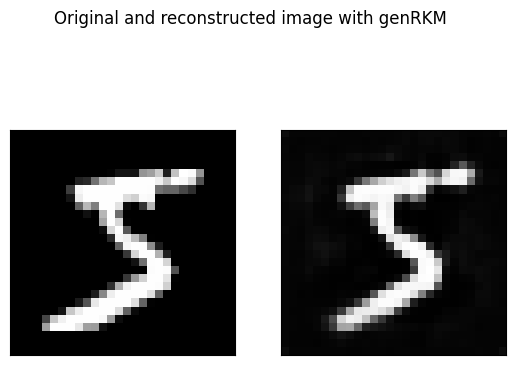

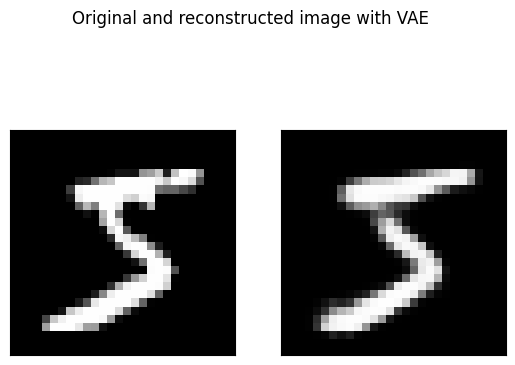

In [6]:
attack_genRKM.plot_ori_back()
attack_VAE.plot_ori_back()

In [9]:
LPIPS_VAE = []
LPIPS_genRKM = []
Distortion_VAE = []
Distortion_genRKM = []
SSIM_VAE = []
SSIM_genRKM = []

nbr_images = 25
it_VAE = 1

for image in range(nbr_images):
    attack_genRKM.adversarial_attack(image, 0, 0.5, 0.1, False)
    attack_VAE.adversarial_attack(image, 0, 0.5, 0.1, False)

    list_temp_VAE_lpips = []
    list_temp_VAE_distortion = []
    list_temp_VAE_ssim = []

    for iterations_VAE in range(it_VAE):
        lpips_input_VAE, lpips_output_VAE = attack_VAE.get_lpips_arrays()
        distortion_input_VAE, distortion_output_VAE = attack_VAE.get_distortion_arrays()
        sssim_input_VAE, ssim_output_VAE = attack_VAE.get_ssim_arrays()

        list_temp_VAE_lpips.append(lpips_output_VAE[0])
        list_temp_VAE_distortion.append(distortion_output_VAE[0])
        list_temp_VAE_ssim.append(ssim_output_VAE[0])

    lpips_input_genRKM, lpips_output_genRKM = attack_genRKM.get_lpips_arrays()
    distortion_input_genRKM, distortion_output_genRKM = attack_genRKM.get_distortion_arrays()
    ssim_input_genRKM, ssim_output_genRKM = attack_genRKM.get_ssim_arrays()

    LPIPS_VAE.append(np.mean(list_temp_VAE_lpips))
    LPIPS_genRKM.append(lpips_output_genRKM[0])

    Distortion_VAE.append(np.mean(list_temp_VAE_distortion))
    Distortion_genRKM.append(distortion_output_genRKM[0])

    SSIM_VAE.append(np.mean(list_temp_VAE_ssim))
    SSIM_genRKM.append(ssim_output_genRKM[0])

In [10]:
print(f"mean VAE LPIPS {np.round(np.mean(LPIPS_VAE),4)} and std dev {np.round(np.std(LPIPS_VAE),4)}")
print(f"mean VAE Distortion {np.round(np.mean(Distortion_VAE),4)} and std dev {np.round(np.std(Distortion_VAE),4)}")
print(f"mean VAE SSIM {np.round(np.mean(SSIM_VAE),4)} and std dev {np.round(np.std(SSIM_VAE),4)}")

mean VAE LPIPS 0.071 and std dev 0.0187
mean VAE Distortion 2.6585 and std dev 0.5266
mean VAE SSIM 0.8801 and std dev 0.043


In [5]:
print(f"mean genRKM LPIPS {np.round(np.mean(LPIPS_genRKM),4)} and std dev {np.round(np.std(LPIPS_genRKM),4)}")
print(f"mean genRKM Distortion {np.round(np.mean(Distortion_genRKM),4)} and std dev {np.round(np.std(Distortion_genRKM),4)}")
print(f"mean genRKM SSIM {np.round(np.mean(SSIM_genRKM),4)} and std dev {np.round(np.std(SSIM_genRKM),4)}")

mean genRKM LPIPS 0.0682 and std dev 0.0292
mean genRKM Distortion 2.2547 and std dev 0.659
mean genRKM SSIM 0.7891 and std dev 0.0977


c:\Users\gcorl\OneDrive\Documents\KUL\Master 2\Master thesis\Programming\Restricted_Kernel_Machines_Demo_MNIST\class_Adv_attack_genRKM.py:340: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.image_adv = torch.tensor(self.image_ori, requires_grad=True)


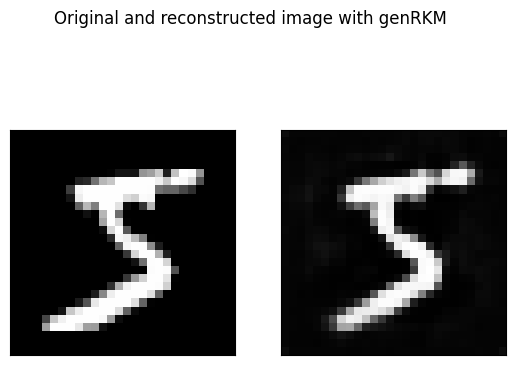

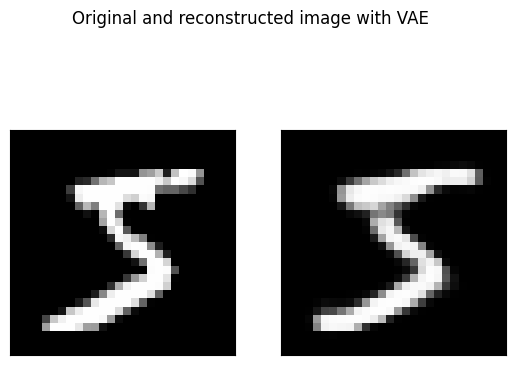

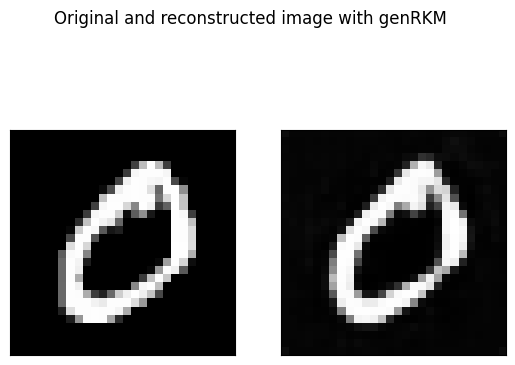

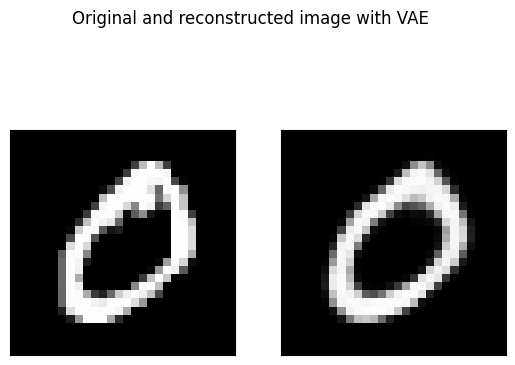

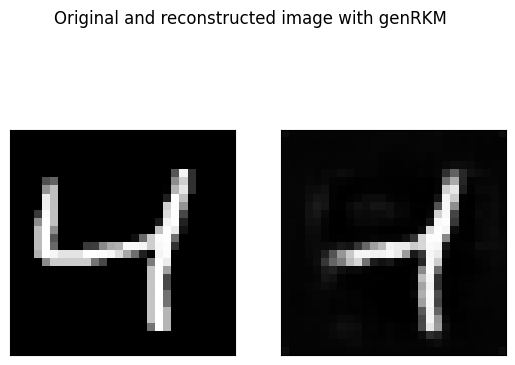

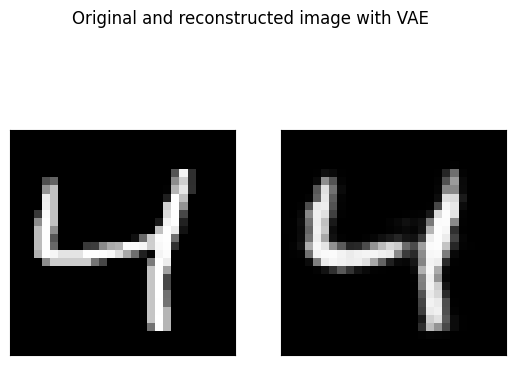

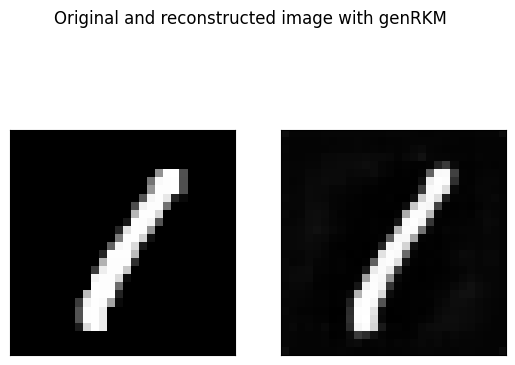

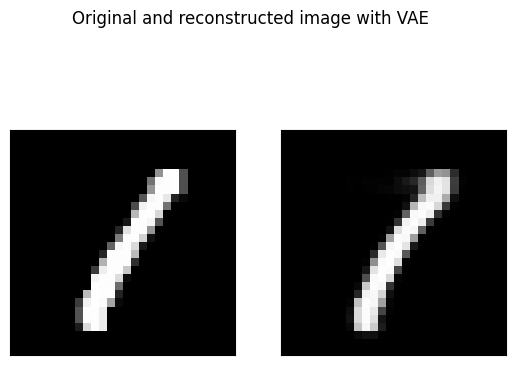

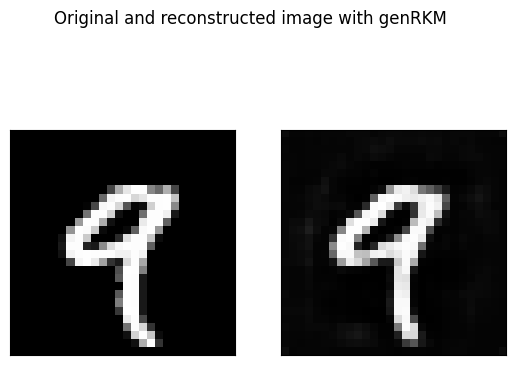

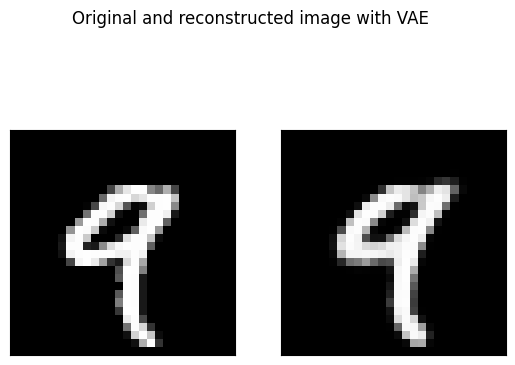

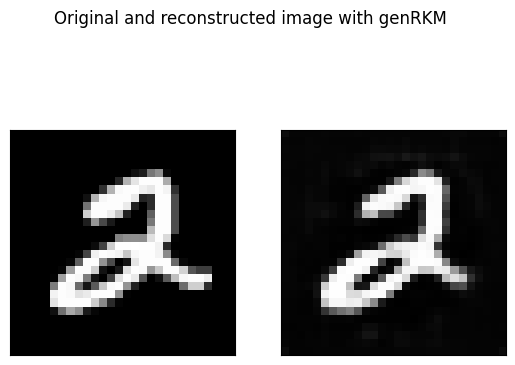

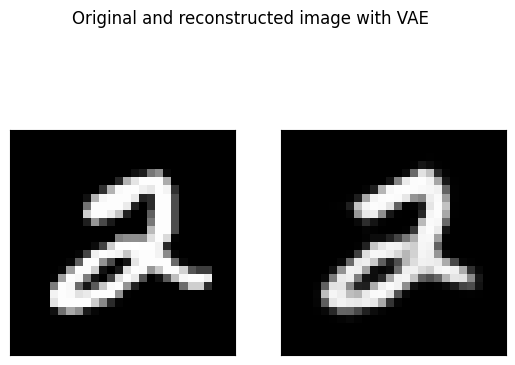

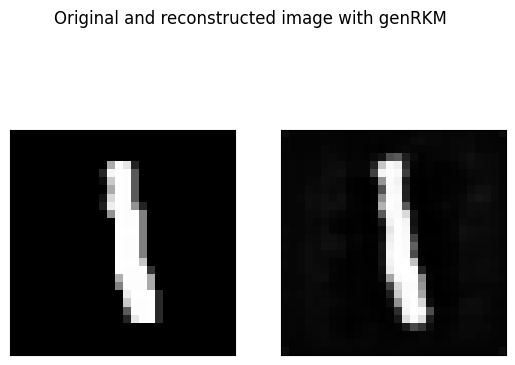

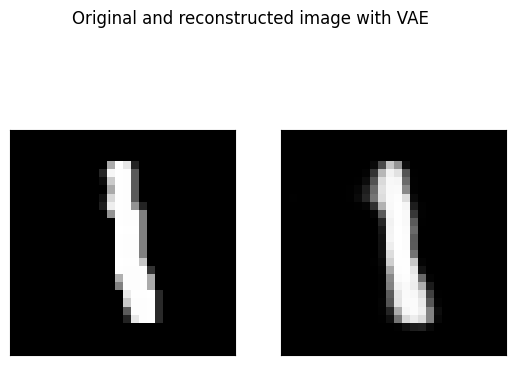

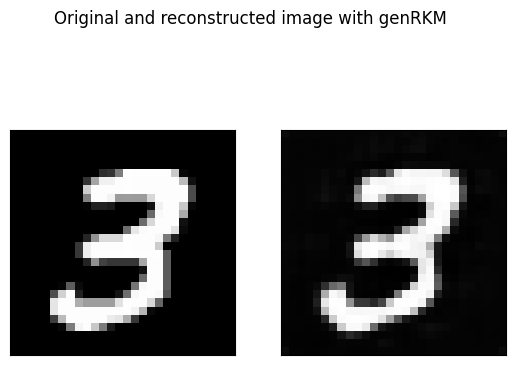

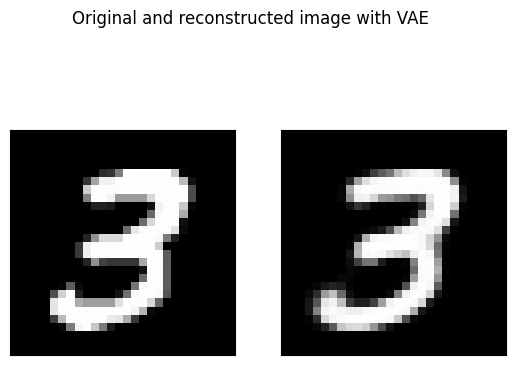

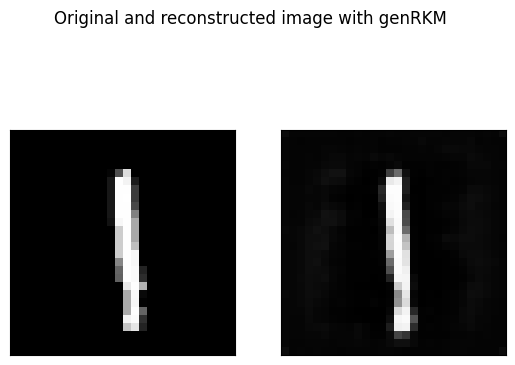

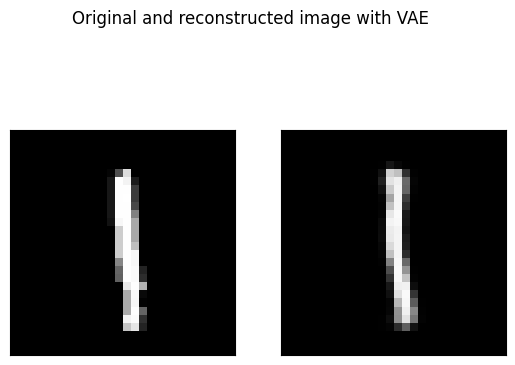

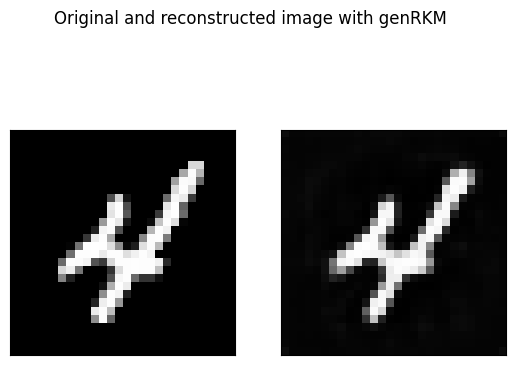

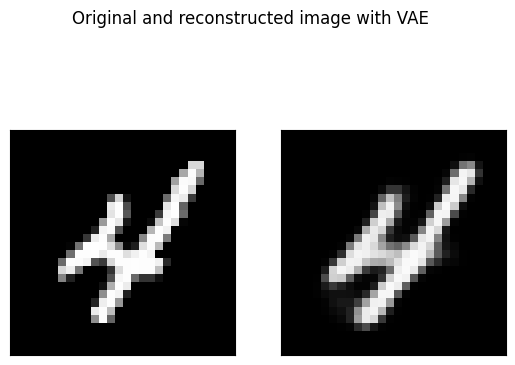

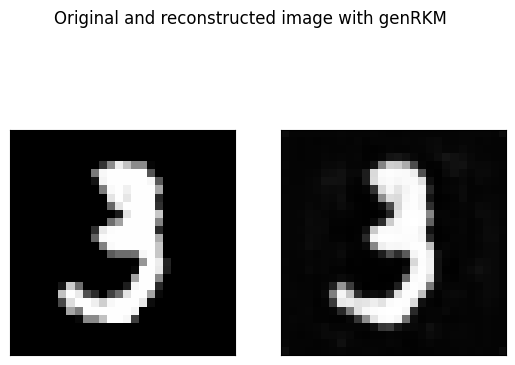

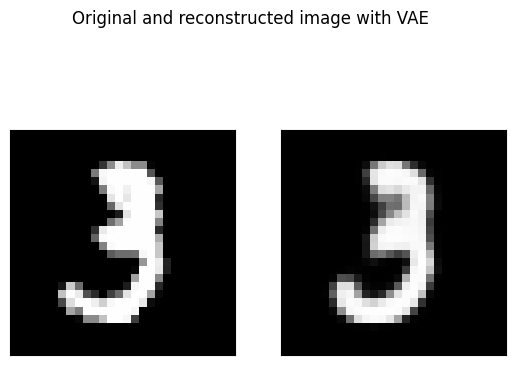

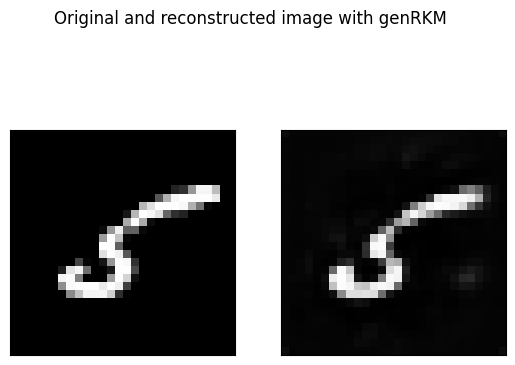

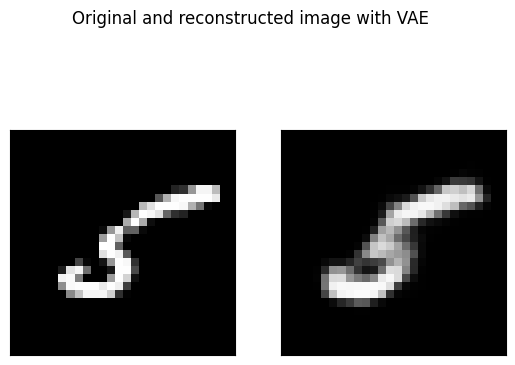

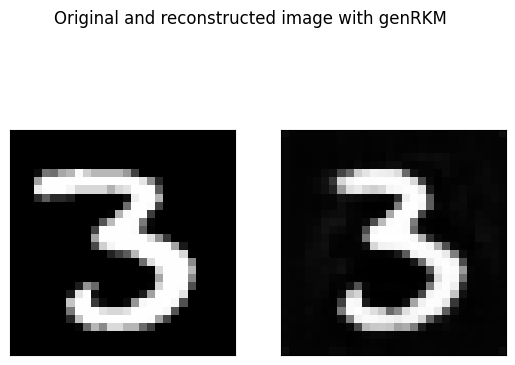

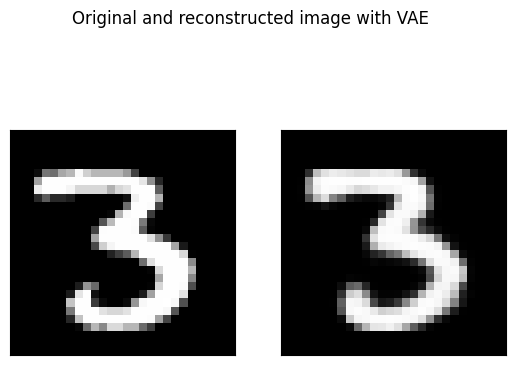

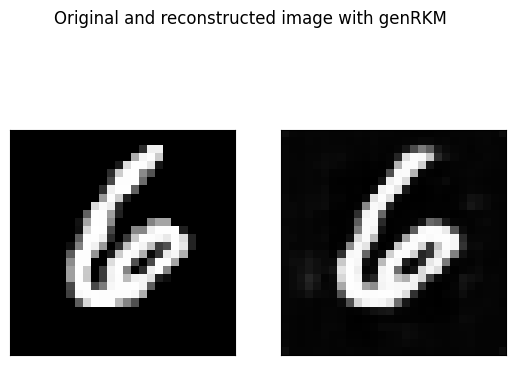

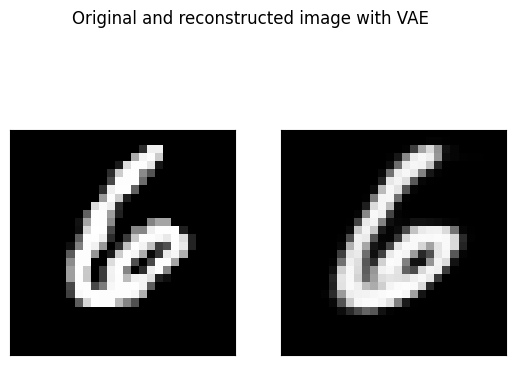

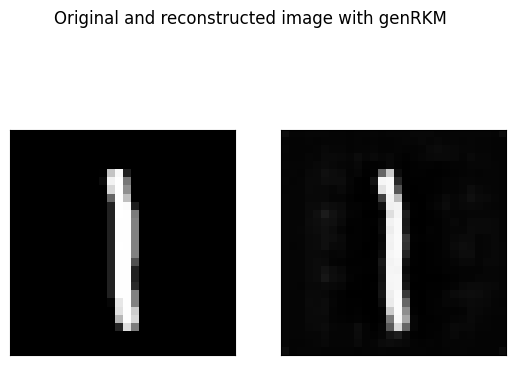

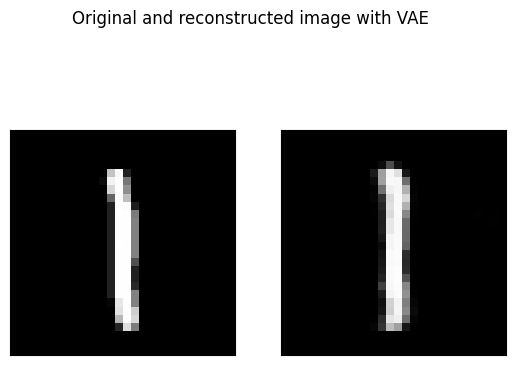

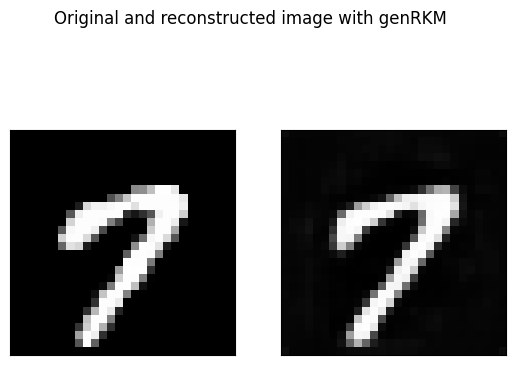

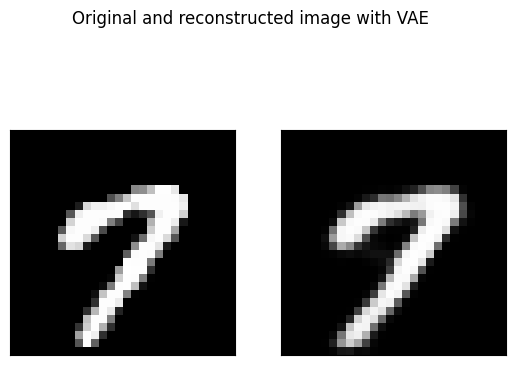

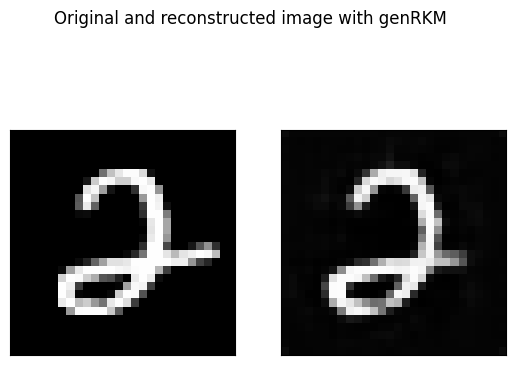

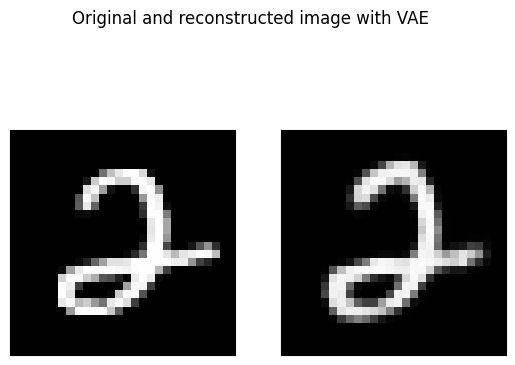

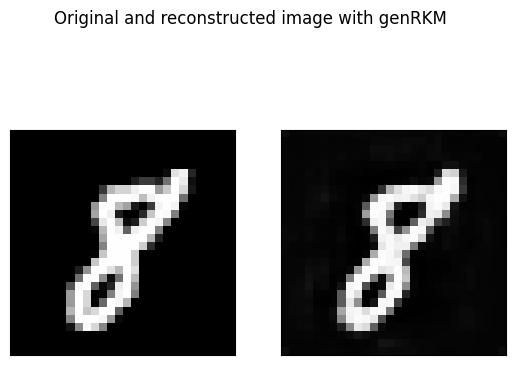

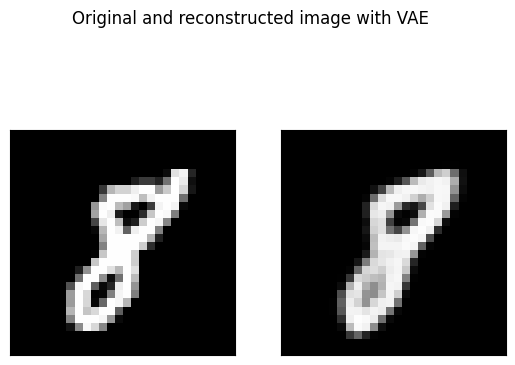

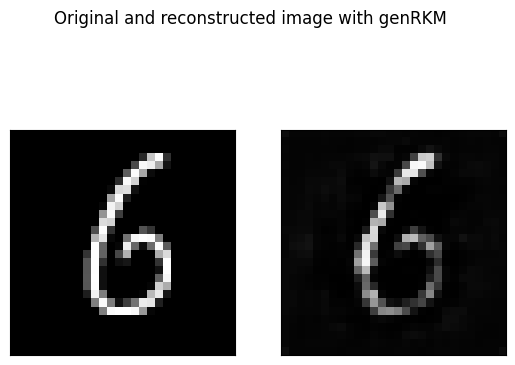

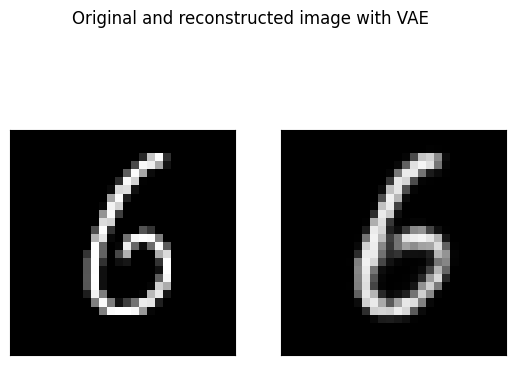

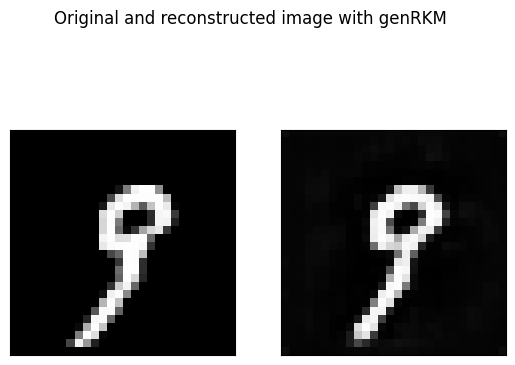

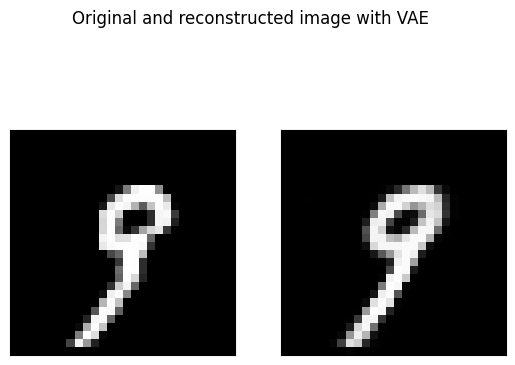

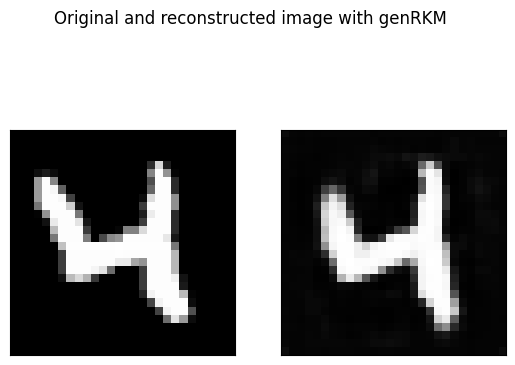

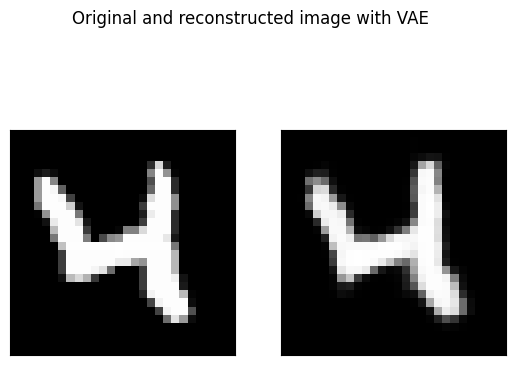

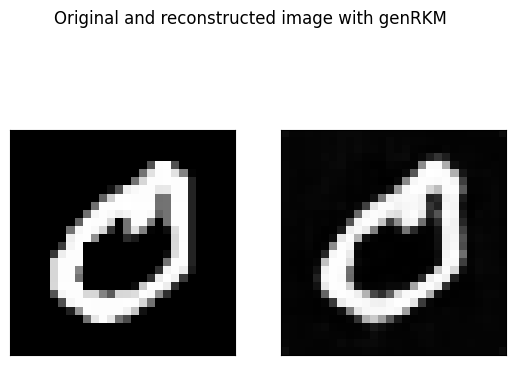

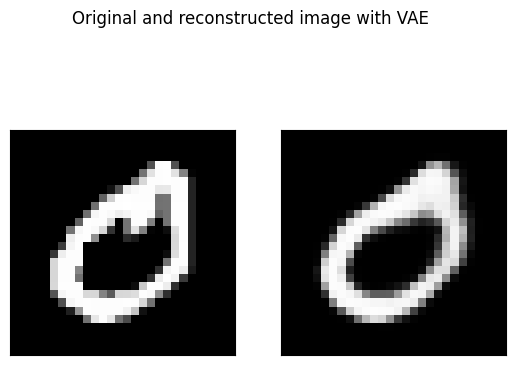

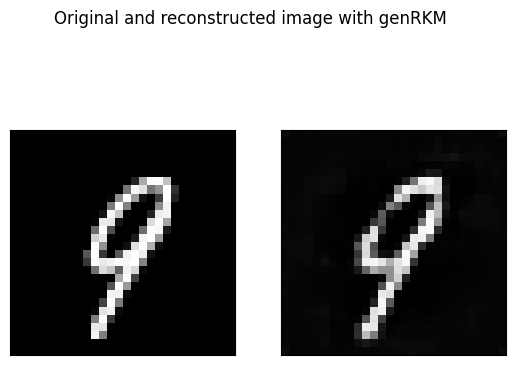

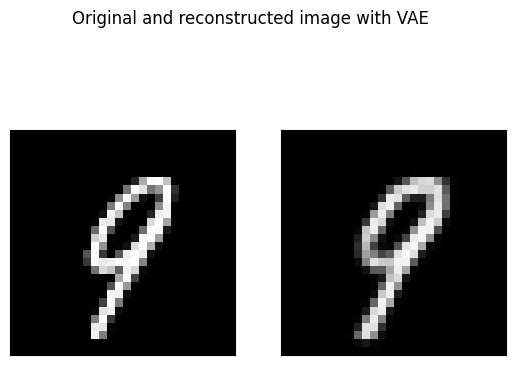

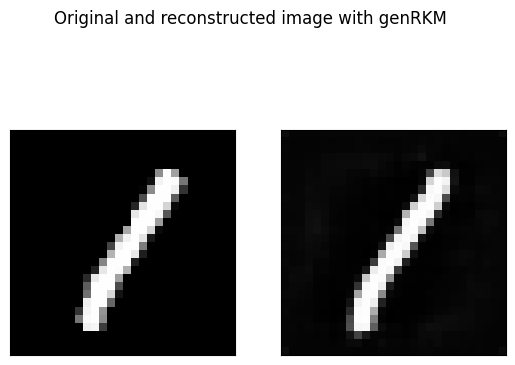

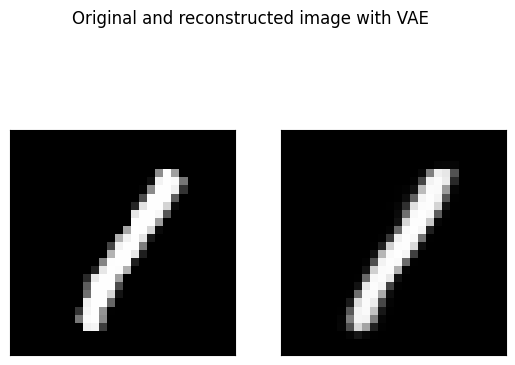

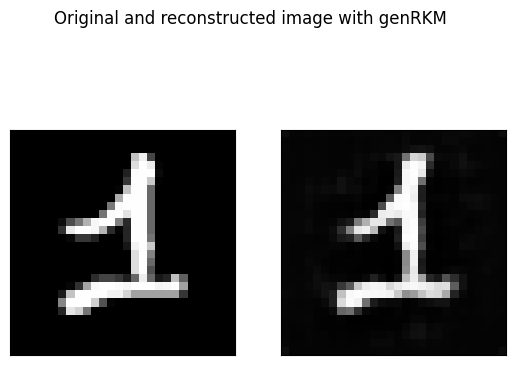

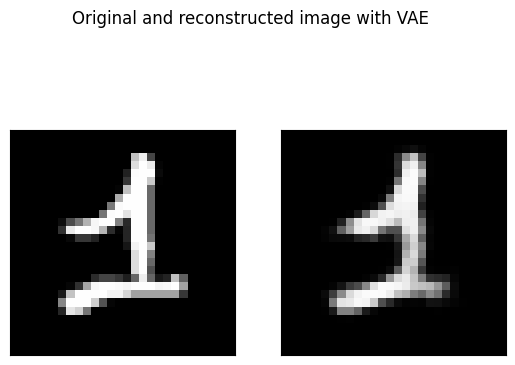

In [3]:
for image in range(25):
    attack_genRKM.adversarial_attack(image, 0, 0.5, 0.1, False)
    attack_VAE.adversarial_attack(image, 0, 0.5, 0.1, False)

    attack_genRKM.plot_ori_back()
    attack_VAE.plot_ori_back()

In [19]:
attack_genRKM.adversarial_attack_lim(0, 2.5, 0.1, 0.1, False)
attack_VAE.adversarial_attack_lim(0, 2.5, 0.1, 0.1, False)

c:\Users\gcorl\OneDrive\Documents\KUL\Master 2\Master thesis\Programming\Restricted_Kernel_Machines_Demo_MNIST\myenv\lib\site-packages\torchvision\datasets\mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
c:\Users\gcorl\OneDrive\Documents\KUL\Master 2\Master thesis\Programming\Restricted_Kernel_Machines_Demo_MNIST\class_Adv_attack_genRKM.py:398: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.image_adv = torch.tensor(self.image_ori, requires_grad=True)


'Attack succeeded'

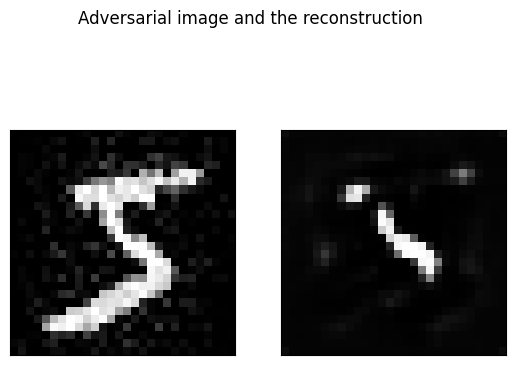

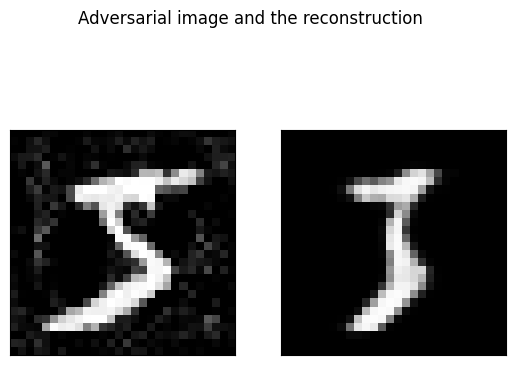

In [20]:
attack_genRKM.plot_adv_back()
attack_VAE.plot_adv_back()

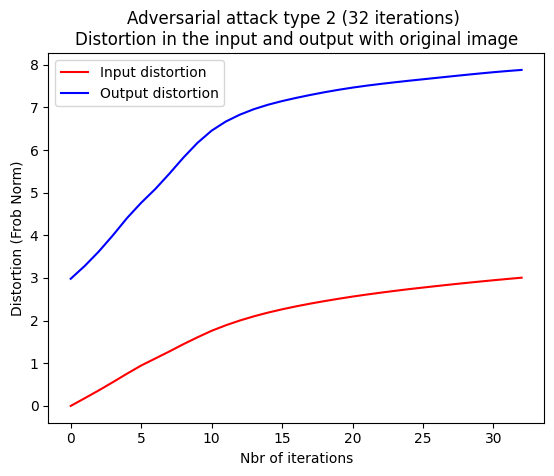

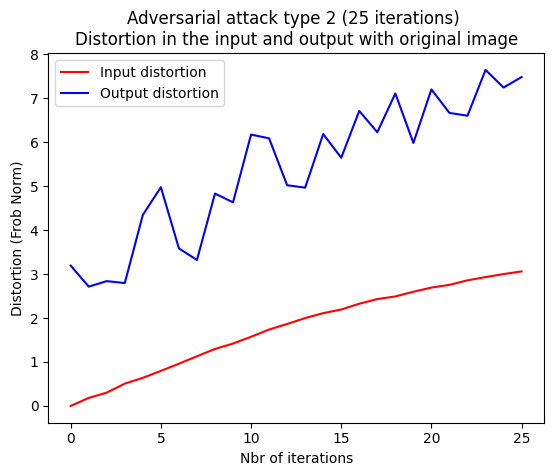

In [16]:
attack_genRKM.plot_distortion()
attack_VAE.plot_distortion()

In [6]:
nbr_images = 25

lpips_input_VAE_set = []
lpips_input_genRKM_set = []
lpips_output_VAE_set = []
lpips_output_genRKM_set = []

distortion_input_VAE_set = []
distortion_input_genRKM_set = []
distortion_output_VAE_set = []
distortion_output_genRKM_set = []

ssim_input_VAE_set = []
ssim_input_genRKM_set = []
ssim_output_VAE_set = []
ssim_output_genRKM_set = []

it_VAE_set = []
it_genRKM_set = []

for image in range(nbr_images):
    attack_genRKM.adversarial_attack_lim(image, 3, 0.1, 0.1, False)
    attack_VAE.adversarial_attack_lim(image, 3, 0.1, 0.1, False)

    lpips_input_VAE, lpips_output_VAE = attack_VAE.get_lpips_arrays()
    distortion_input_VAE, distortion_output_VAE = attack_VAE.get_distortion_arrays()
    ssim_input_VAE, ssim_output_VAE = attack_VAE.get_ssim_arrays()

    lpips_input_genRKM, lpips_output_genRKM = attack_genRKM.get_lpips_arrays()
    distortion_input_genRKM, distortion_output_genRKM = attack_genRKM.get_distortion_arrays()
    ssim_input_genRKM, ssim_output_genRKM = attack_genRKM.get_ssim_arrays()

    ssim_input_VAE_set.append(ssim_input_VAE)
    ssim_input_genRKM_set.append(ssim_input_genRKM)
    ssim_output_VAE_set.append(ssim_output_VAE)
    ssim_output_genRKM_set.append(ssim_output_genRKM)

    distortion_input_VAE_set.append(distortion_input_VAE)
    distortion_input_genRKM_set.append(distortion_input_genRKM)
    distortion_output_VAE_set.append(distortion_output_VAE)
    distortion_output_genRKM_set.append(distortion_output_genRKM)
    
    lpips_input_VAE_set.append(lpips_input_VAE)
    lpips_input_genRKM_set.append(lpips_input_genRKM)
    lpips_output_VAE_set.append(lpips_output_VAE)
    lpips_output_genRKM_set.append(lpips_output_genRKM)

    it_VAE_set.append(attack_VAE.get_it_attack())
    it_genRKM_set.append(attack_genRKM.get_it_attack())

    print(f"iteration {image} done")

c:\Users\gcorl\OneDrive\Documents\KUL\Master 2\Master thesis\Programming\Restricted_Kernel_Machines_Demo_MNIST\myenv\lib\site-packages\torchvision\datasets\mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
c:\Users\gcorl\OneDrive\Documents\KUL\Master 2\Master thesis\Programming\Restricted_Kernel_Machines_Demo_MNIST\class_Adv_attack_genRKM.py:417: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.image_adv = torch.tensor(self.image_ori, requires_grad=True)


iteration 0 done
iteration 1 done
iteration 2 done
iteration 3 done
iteration 4 done
iteration 5 done
iteration 6 done
iteration 7 done
iteration 8 done
iteration 9 done
iteration 10 done
iteration 11 done
iteration 12 done
iteration 13 done
iteration 14 done
iteration 15 done
iteration 16 done
iteration 17 done
iteration 18 done
iteration 19 done
iteration 20 done
iteration 21 done
iteration 22 done
iteration 23 done
iteration 24 done


In [6]:
print(f"VAE iterations {np.mean(it_VAE_set)} and std dev {np.round(np.std(it_VAE_set),2)}")
print(f"genRKM iterations {np.mean(it_genRKM_set)} and std dev {np.round(np.std(it_genRKM_set),2)}")

VAE iterations 23.0 and std dev 3.3
genRKM iterations 49.44 and std dev 64.08


In [7]:
print(it_genRKM_set)

[32, 23, 84, 33, 31, 33, 29, 20, 58, 33, 26, 56, 24, 24, 67, 24, 32, 27, 353, 41, 34, 23, 69, 31, 29]


In [9]:
copy_it_genRKM_set = it_genRKM_set.copy()
copy_it_genRKM_set.pop(18)
print(copy_it_genRKM_set)

[32, 23, 84, 33, 31, 33, 29, 20, 58, 33, 26, 56, 24, 24, 67, 24, 32, 27, 41, 34, 23, 69, 31, 29]


In [12]:
print(f"genRKM iterations {np.round(np.mean(copy_it_genRKM_set),2)} and std dev {np.round(np.std(copy_it_genRKM_set),2)}")

genRKM iterations 36.79 and std dev 16.67


In [11]:
#get average output distortion at the end of the attack

reference_points = [0, 0.5, 1, 1.5, 2, 2.5, 3]

lpips_avg_VAE = []
distortion_avg_VAE = []
ssim_avg_VAE = []

lpips_avg_genRKM = []
distortion_avg_genRKM = []
ssim_avg_genRKM = []

lpips_std_dev_VAE = []
distortion_std_dev_VAE = []
ssim_std_dev_VAE = []

lpips_std_dev_genRKM = []
distortion_std_dev_genRKM = []
ssim_std_dev_genRKM = []

In [13]:
def average_first_element(list_of_lists):
    total = 0
    count = 0
    for sublist in list_of_lists:
        if len(sublist) > 0:  # Ensure sublist is not empty
            total += sublist[0]
            count += 1
    if count == 0:
        return 0  # Return 0 if there are no valid sublists
    return total / count

In [8]:
def average_last_element(list_of_lists):
    total = 0
    count = 0
    for sublist in list_of_lists:
        if len(sublist) > 0:  # Ensure sublist is not empty
            total += sublist[-1]
            count += 1
    if count == 0:
        return 0  # Return 0 if there are no valid sublists
    return total / count

In [12]:
def average_and_std_dev_last_element(list_of_lists, show_mean):
    total = 0
    count = 0
    for sublist in list_of_lists:
        if len(sublist) > 0:  # Ensure sublist is not empty
            total += sublist[-1]
            count += 1
    if count == 0:
        return 0, 0  # Return 0 for both average and standard deviation if there are no valid sublists
    mean = total / count

    # Calculate squared differences and sum them up
    squared_diff_sum = 0
    for sublist in list_of_lists:
        if len(sublist) > 0:  # Ensure sublist is not empty
            squared_diff_sum += (sublist[-1] - mean) ** 2

    # Compute the variance (mean of squared differences)
    variance = squared_diff_sum / count

    # Compute the standard deviation (square root of variance)
    std_deviation = math.sqrt(variance)

    if(show_mean):
        return mean
    else:
        return std_deviation

In [22]:
def average_element(target, input, output):
    total = 0
    count = 0
    for index_list in range(len(input)):
        min_dist = 999999999
        best_output = 9999999999
        input_array = input[index_list]
        output_array = output[index_list]
        
        for index_inner in range(len(input_array)):
            if(np.abs(input_array[index_inner]-target)<min_dist):
                min_dist = np.abs(input_array[index_inner]-target)
                best_output = output_array[index_inner]
        total += best_output
        count += 1

    return total / count


In [13]:
def average_and_std(target, input, output):
    total = 0
    count = 0
    squared_diff_sum = 0

    best_output_array = []

    for index_list in range(len(input)):
        min_dist = 999999
        best_output = 99999999
        input_array = input[index_list]
        output_array = output[index_list]
        
        for index_inner in range(len(input_array)):
            if np.abs(input_array[index_inner] - target) < min_dist:
                min_dist = np.abs(input_array[index_inner] - target)
                best_output = output_array[index_inner]
        
        best_output_array.append(best_output)
        total += best_output
        count += 1

    # Calculate mean
    mean = total / count

    # Calculate squared differences
    for index_list in range(len(input)):
        input_array = input[index_list]
        output_array = output[index_list]
        
        for best_output_value in best_output_array:
            squared_diff_sum += (best_output_value - mean) ** 2
    
    # Calculate standard deviation
    std_dev = np.sqrt(squared_diff_sum / count)

    return mean, std_dev

In [14]:
def get_elements_close(target, input, output):
    count = 0

    best_output_array = []

    for index_list in range(len(input)):
        min_dist = 999999
        best_output = 99999999
        input_array = input[index_list]
        output_array = output[index_list]
        
        for index_inner in range(len(input_array)):
            if np.abs(input_array[index_inner] - target) < min_dist:
                min_dist = np.abs(input_array[index_inner] - target)
                best_output = output_array[index_inner]
        
        best_output_array.append(best_output)
        count += 1

    return best_output_array

In [32]:
#lpips_avg_VAE.append(average_first_element(lpips_output_VAE_set))
#distortion_avg_VAE.append(average_first_element(distortion_output_VAE_set))
#lpips_avg_genRKM.append(average_first_element(lpips_output_genRKM_set))
#distortion_avg_genRKM.append(average_first_element(distortion_output_genRKM_set))

In [15]:
lpips_avg_VAE.append(average_and_std_dev_last_element(lpips_output_VAE_set, True))
distortion_avg_VAE.append(average_and_std_dev_last_element(distortion_output_VAE_set, True))
ssim_avg_VAE.append(average_and_std_dev_last_element(ssim_output_VAE_set, True))
lpips_avg_genRKM.append(average_and_std_dev_last_element(lpips_output_genRKM_set, True))
distortion_avg_genRKM.append(average_and_std_dev_last_element(distortion_output_genRKM_set, True))
ssim_avg_genRKM.append(average_and_std_dev_last_element(ssim_output_genRKM_set, True))

lpips_std_dev_VAE.append(average_and_std_dev_last_element(lpips_output_VAE_set, False))
distortion_std_dev_VAE.append(average_and_std_dev_last_element(distortion_output_VAE_set, False))
ssim_std_dev_VAE.append(average_and_std_dev_last_element(ssim_output_VAE_set, False))
lpips_std_dev_genRKM.append(average_and_std_dev_last_element(lpips_output_genRKM_set, False))
distortion_std_dev_genRKM.append(average_and_std_dev_last_element(distortion_output_genRKM_set, False))
ssim_std_dev_genRKM.append(average_and_std_dev_last_element(ssim_output_genRKM_set, False))

In [16]:
print(np.round(lpips_avg_VAE[0],4), np.round(distortion_avg_VAE[0],3), np.round(ssim_avg_VAE[0],4), np.round(lpips_avg_genRKM[0],4), np.round(distortion_avg_genRKM[0],3), np.round(ssim_avg_genRKM[0],4))
print(np.round(lpips_std_dev_VAE[0],4), np.round(distortion_std_dev_VAE[0],3), np.round(ssim_std_dev_VAE[0],4), np.round(lpips_std_dev_genRKM[0],4), np.round(distortion_std_dev_genRKM[0],3), np.round(ssim_std_dev_genRKM[0],4))


0.2991 7.859 0.2705 0.3808 7.645 0.1742
0.059 0.706 0.1106 0.0721 0.799 0.1014


In [28]:
print(average_element(0.5,lpips_input_VAE_set, lpips_output_VAE_set))

0.5213416469097137


In [17]:
distortion_avg_VAE = []
distortion_avg_genRKM = []

distortion_std_dev_VAE = []
distortion_std_dev_genRKM = []

for element in reference_points:
    avg_VAE, std_VAE = average_and_std(element, distortion_input_VAE_set, distortion_output_VAE_set)
    avg_genRKM, std_genRKM = average_and_std(element,distortion_input_genRKM_set, distortion_output_genRKM_set)

    distortion_avg_VAE.append(avg_VAE)
    distortion_avg_genRKM.append(avg_genRKM)
    distortion_std_dev_VAE.append(std_VAE)
    distortion_std_dev_genRKM.append(std_genRKM) 


In [18]:
#get elements close

Lists_close_distortion_VAE = []
Lists_close_distortion_genRKM = []

Lists_close_lpips_VAE = []
Lists_close_lpips_genRKM = []

Lists_close_ssim_VAE = []
Lists_close_ssim_genRKM = []

for element in reference_points:
    #print("iteration")
    list_closest_distortion_VAE = get_elements_close(element, distortion_input_VAE_set, distortion_output_VAE_set)
    list_closest_distortion_genRKM = get_elements_close(element, distortion_input_genRKM_set, distortion_output_genRKM_set)

    list_closest_lpips_VAE = get_elements_close(element, distortion_input_VAE_set, lpips_output_VAE_set)
    list_closest_lpips_genRKM = get_elements_close(element, distortion_input_genRKM_set, lpips_output_genRKM_set)

    list_closest_ssim_VAE = get_elements_close(element, distortion_input_VAE_set, ssim_output_VAE_set)
    list_closest_ssim_genRKM = get_elements_close(element, distortion_input_genRKM_set, ssim_output_genRKM_set)


    Lists_close_distortion_VAE.append(list_closest_distortion_VAE)
    Lists_close_distortion_genRKM.append(list_closest_distortion_genRKM)

    Lists_close_lpips_VAE.append(list_closest_lpips_VAE)
    Lists_close_lpips_genRKM.append(list_closest_lpips_genRKM)

    Lists_close_ssim_VAE.append(list_closest_ssim_VAE)
    Lists_close_ssim_genRKM.append(list_closest_ssim_genRKM)

In [22]:
print(Lists_close_distortion_VAE)

[[2.693303748880648, 3.5224492209048117, 2.214979021212835, 1.4943947765770167, 2.576605067443102, 2.78941912285625, 3.252361580910109, 2.968777524868967, 1.7015592210319108, 2.8186071420549395, 3.426630898864917, 2.6687718352601815, 3.3573591560035316, 3.0774009581429627, 1.2919147612185924, 2.828963339421155, 2.734996928077757, 3.2377854689154613, 2.6962180105879145, 2.879398518405952, 2.477180755363232, 2.9995473581906147, 2.5542936925826982, 1.7013460538089709, 3.302735511271789], [3.3377527124895865, 3.724620139716837, 2.7861629924540026, 2.157462375375661, 3.0631922432358, 3.890986930756931, 2.363151398418491, 3.1999624037098062, 2.1246741700577307, 3.558142601969923, 3.583050913070663, 3.1485303328941647, 3.407297749094258, 3.5295589453217886, 1.619856254219589, 2.4598487743813635, 2.9521602701041316, 3.26821262200238, 2.8413080638273907, 2.5267945314824662, 2.685063346855968, 4.728208747947727, 3.352939612731664, 1.6972120382084148, 2.682666499454527], [3.051935861710488, 4.778

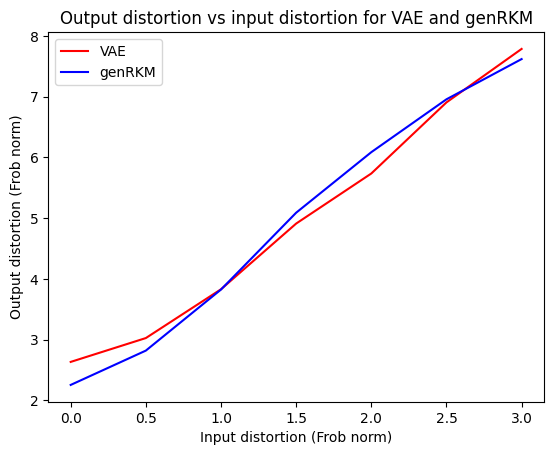

In [19]:
# Plot the curves
plt.plot(reference_points, distortion_avg_VAE, color='red', label='VAE')
plt.plot(reference_points, distortion_avg_genRKM, color='blue', label='genRKM')

# Add labels and legend
plt.xlabel('Input distortion (Frob norm)')
plt.ylabel('Output distortion (Frob norm)')
plt.title('Output distortion vs input distortion for VAE and genRKM')
plt.legend()

# Show plot
plt.show()

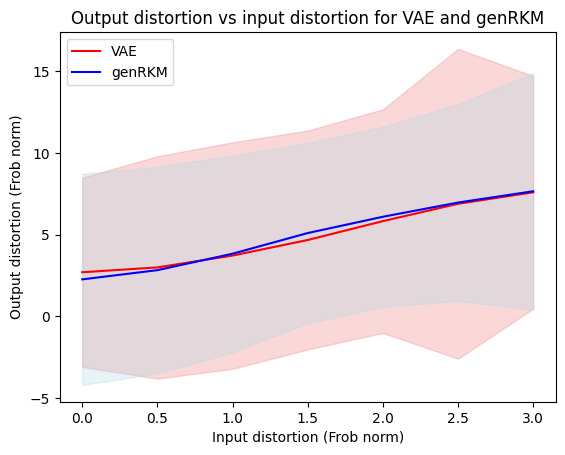

In [11]:
ci_VAE_upper = np.array(distortion_avg_VAE) + 1.96 * np.array(distortion_std_dev_VAE)
ci_VAE_lower = np.array(distortion_avg_VAE) - 1.96 * np.array(distortion_std_dev_VAE)
ci_genRKM_upper = np.array(distortion_avg_genRKM) + 1.96 * np.array(distortion_std_dev_genRKM)
ci_genRKM_lower = np.array(distortion_avg_genRKM) - 1.96 * np.array(distortion_std_dev_genRKM)

# Plot the curves
plt.plot(reference_points, distortion_avg_VAE, color='red', label='VAE')
plt.plot(reference_points, distortion_avg_genRKM, color='blue', label='genRKM')

# Plot the 95% confidence interval lines
plt.fill_between(reference_points, ci_VAE_upper, ci_VAE_lower, color='lightcoral', alpha=0.3)
plt.fill_between(reference_points, ci_genRKM_upper, ci_genRKM_lower, color='lightblue', alpha=0.3)

# Add labels and legend
plt.xlabel('Input distortion (Frob norm)')
plt.ylabel('Output distortion (Frob norm)')
plt.title('Output distortion vs input distortion for VAE and genRKM')
plt.legend(loc='upper left')

# Show plot
plt.show()

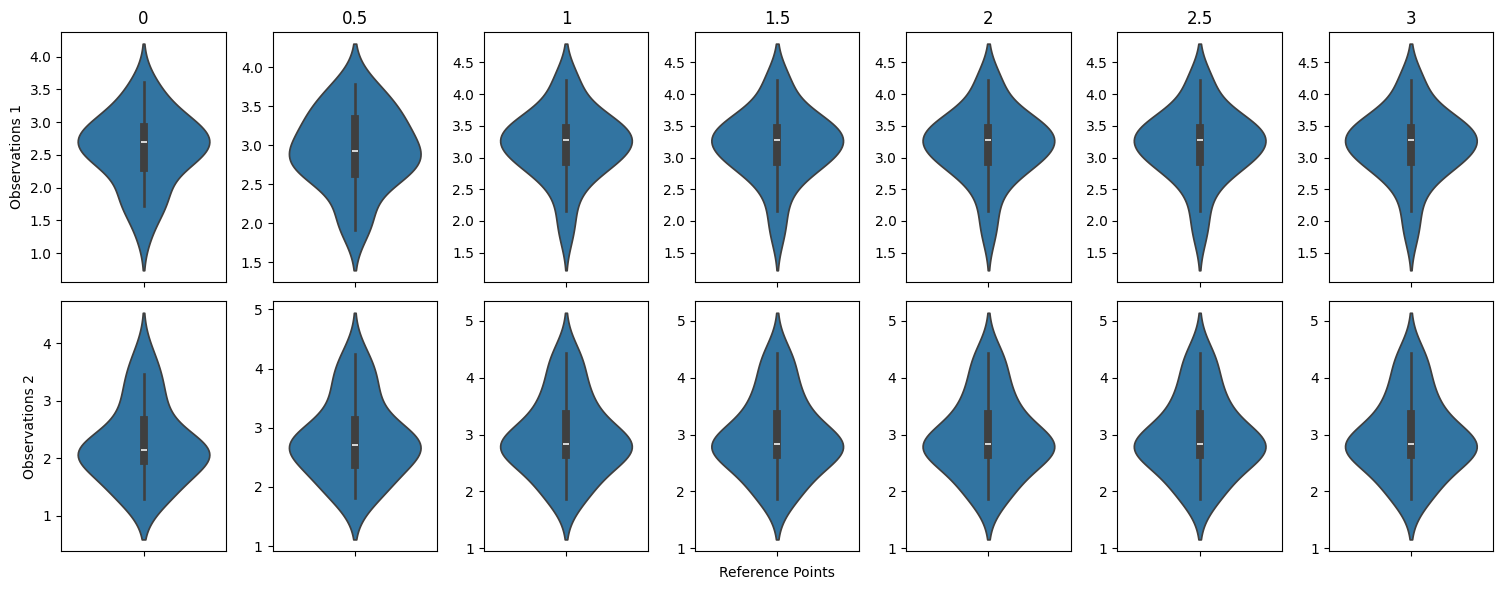

In [10]:
# Create a figure and axis objects
fig, axs = plt.subplots(nrows=2, ncols=len(reference_points), figsize=(15, 6))

# Draw violin plots for each reference point
for i, (rp, obs1, obs2) in enumerate(zip(reference_points, Lists_close_distortion_VAE, Lists_close_distortion_genRKM)):
    ax = axs[0, i]  # Top subplot for observations_1
    sns.violinplot(data=obs1, ax=ax)
    ax.set_title(rp)
    if i == 0:
        ax.set_ylabel('Observations 1')
    else:
        ax.set_ylabel('')
    
    ax = axs[1, i]  # Bottom subplot for observations_2
    sns.violinplot(data=obs2, ax=ax)
    if i == 0:
        ax.set_ylabel('Observations 2')
    else:
        ax.set_ylabel('')
    ax.set_xticklabels([])

# Set x-axis tick labels
for ax in axs.flat:
    ax.set_xlabel('')

for ax in axs[0]:
    ax.set_xticklabels([])

# Set labels and title
axs[1, len(reference_points) // 2].set_xlabel('Reference Points')
plt.tight_layout()
plt.show()

In [28]:
reference_matrix = [25*[item] for item in reference_points]
#print((reference_matrix))

traces = []

for i in range(len(reference_points)):

    # Create a trace for the holiday distribution
    trace1 = go.Violin(
        x=reference_matrix[i],
        y=Lists_close_distortion_VAE[i],
        name='VAE' if i == 0 else None,
        side='negative',
        box_visible=True,
        meanline_visible=True,
        #hovertemplate='Holiday<br>Noise Level: %{y.2f} dB(A)',
        #hoverlabel=dict(namelength=0),
        fillcolor='red',  
        line=dict(color='rgba(0, 0, 0, 0.8)', width=1) ,
        showlegend=(i == 0) 
    )

    # Create a trace for the normal day distribution
    trace2 = go.Violin(
        x=reference_matrix[i], #to put the two graphs next to each other instead of separately
        y=Lists_close_distortion_genRKM[i],
        name='genRKM' if i == 0 else None,
        side='positive',
        box_visible=True,
        meanline_visible=True,
        #hovertemplate='Normal Day<br>Noise Level: %{y.2f} dB(A)',
        #hoverlabel=dict(namelength=0),
        fillcolor='blue',
        line=dict(color='rgba(0, 0, 0, 0.8)', width=1) ,
        showlegend=(i == 0)
    )

    traces.append(trace1)
    traces.append(trace2)

# Create the layout for the plot
layout_fig1 = go.Layout(
    title=dict(
        text='Distribution of the output distortion for different input distortion levels',
        x=0.5,
        xanchor='center',
        font=dict(color="black", size=24)
    ),
    title_font=dict(size=24, color="black"),  
    xaxis=dict(
        {'title': 'Input distortion'}, 
        range = [-0.2, 3.2],
        #ticktext = ["false",'Holiday - Normal day'],
        title_font=dict(color="black", size = 18),
        tickfont=dict(color='black'),
        showticklabels=True, 
        tickvals = reference_points, 
        ticktext = reference_points,
        gridcolor='black'),
    yaxis=dict(
        {'title': 'Output distortion'},
        title_font=dict(color="black", size = 18),
        tickfont=dict(color="black"),
        #showticklabels=False,
        range = [-0.5, 10],
        tickvals=list(range(11)),
        gridcolor='black',
        zeroline=True,  # Ensure the zeroline is shown
        zerolinecolor='black',  # Set the color of the zeroline to black
        zerolinewidth=1  # Set the width of the zeroline
        ),
    violingap=0,  # Set the gap between violins to 0 for overlapping
    plot_bgcolor='white',  
    paper_bgcolor='white',  
    legend = dict(font=dict(color='black'))
)

layout_fig1.update(width=800, height=600)

# Create the figure and add the traces
fig1 = go.Figure(data=traces, layout=layout_fig1)

# Show the plot
fig1.show()

In [39]:
traces = []

for i in range(len(reference_points)):

    # Create a trace for the holiday distribution
    trace1 = go.Violin(
        x=reference_matrix[i],
        y=Lists_close_lpips_VAE[i],
        name='VAE' if i == 0 else None,
        side='negative',
        box_visible=True,
        meanline_visible=True,
        #hovertemplate='Holiday<br>Noise Level: %{y.2f} dB(A)',
        #hoverlabel=dict(namelength=0),
        fillcolor='red',
        line=dict(color='rgba(0, 0, 0, 0.8)', width=1) ,
        showlegend=(i == 0) 
    )

    # Create a trace for the normal day distribution
    trace2 = go.Violin(
        x=reference_matrix[i], #to put the two graphs next to each other instead of separately
        y=Lists_close_lpips_genRKM[i],
        name='genRKM' if i == 0 else None,
        side='positive',
        box_visible=True,
        meanline_visible=True,
        #hovertemplate='Normal Day<br>Noise Level: %{y.2f} dB(A)',
        #hoverlabel=dict(namelength=0),
        fillcolor='blue',
        line=dict(color='rgba(0, 0, 0, 0.8)', width=1) ,
        showlegend=(i == 0)
    )

    traces.append(trace1)
    traces.append(trace2)

# Create the layout for the plot
layout_fig1 = go.Layout(
    title=dict(
        text='Distribution of the output lpips for different input distortion levels',
        x=0.5,
        xanchor='center',
        font=dict(color="black", size=24)
    ),
    title_font=dict(size=24, color="black"),  
    xaxis=dict(
        {'title': 'Input distortion'}, 
        range = [-0.2, 3.2],
        #ticktext = ["false",'Holiday - Normal day'],
        title_font=dict(color="black", size = 18),
        tickfont=dict(color='black'),
        showticklabels=True, 
        tickvals = reference_points, 
        ticktext = reference_points,
        gridcolor='black'),
    yaxis=dict(
        {'title': 'Output lpips'},
        title_font=dict(color="black", size = 18),
        tickfont=dict(color="black"),
        #showticklabels=False,
        range = [-0.1, 0.7],
        tickvals=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
        gridcolor='black',
        zeroline=True,  # Ensure the zeroline is shown
        zerolinecolor='black',  # Set the color of the zeroline to black
        zerolinewidth=1  # Set the width of the zeroline
        ),
    violingap=0,  # Set the gap between violins to 0 for overlapping
    plot_bgcolor='white',  
    paper_bgcolor='white',  
    legend = dict(font=dict(color='black'))
)

layout_fig1.update(width=800, height=600)

# Create the figure and add the traces
fig1 = go.Figure(data=traces, layout=layout_fig1)

# Show the plot
fig1.show()

In [38]:
traces = []

for i in range(len(reference_points)):

    # Create a trace for the holiday distribution
    trace1 = go.Violin(
        x=reference_matrix[i],
        y=Lists_close_ssim_VAE[i],
        name='VAE' if i == 0 else None,
        side='negative',
        box_visible=True,
        meanline_visible=True,
        #hovertemplate='Holiday<br>Noise Level: %{y.2f} dB(A)',
        #hoverlabel=dict(namelength=0),
        fillcolor='red',
        line=dict(color='rgba(0, 0, 0, 0.8)', width=1) ,
        showlegend=(i == 0) 
    )

    # Create a trace for the normal day distribution
    trace2 = go.Violin(
        x=reference_matrix[i], #to put the two graphs next to each other instead of separately
        y=Lists_close_ssim_genRKM[i],
        name='genRKM' if i == 0 else None,
        side='positive',
        box_visible=True,
        meanline_visible=True,
        #hovertemplate='Normal Day<br>Noise Level: %{y.2f} dB(A)',
        #hoverlabel=dict(namelength=0),
        fillcolor='blue',
        line=dict(color='rgba(0, 0, 0, 0.8)', width=1) ,
        showlegend=(i == 0)
    )

    traces.append(trace1)
    traces.append(trace2)

# Create the layout for the plot
layout_fig1 = go.Layout(
    title=dict(
        text='Distribution of the output ssim for different input distortion levels',
        x=0.5,
        xanchor='center',
        font=dict(color="black", size=24)
    ),
    title_font=dict(size=24, color="black"),  
    xaxis=dict(
        {'title': 'Input distortion'}, 
        range = [-0.2, 3.2],
        #ticktext = ["false",'Holiday - Normal day'],
        title_font=dict(color="black", size = 18),
        tickfont=dict(color='black'),
        showticklabels=True, 
        tickvals = reference_points, 
        ticktext = reference_points,
        gridcolor='black'),
    yaxis=dict(
        {'title': 'Output ssim'},
        title_font=dict(color="black", size = 18),
        tickfont=dict(color="black"),
        #showticklabels=False,
        range = [-0.15, 1],
        tickvals=[-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.7, 0.8, 0.9, 1],
        gridcolor='black',
        zeroline=True,  # Ensure the zeroline is shown
        zerolinecolor='black',  # Set the color of the zeroline to black
        zerolinewidth=1  # Set the width of the zeroline
        ),
    violingap=0,  # Set the gap between violins to 0 for overlapping
    plot_bgcolor='white',  
    paper_bgcolor='white',  
    legend = dict(font=dict(color='black'))
)

layout_fig1.update(width=800, height=600)

# Create the figure and add the traces
fig1 = go.Figure(data=traces, layout=layout_fig1)

# Show the plot
fig1.show()

In [31]:
distortion_avg_VAE

[2.5601860254426407,
 3.104452295080669,
 3.9814609324294734,
 4.895690728807987,
 5.679741168425889,
 6.67722055456031,
 7.478901298877457]

genRKM (0.42129185795783997, 8.495199556589252, 0.22975893318653107)


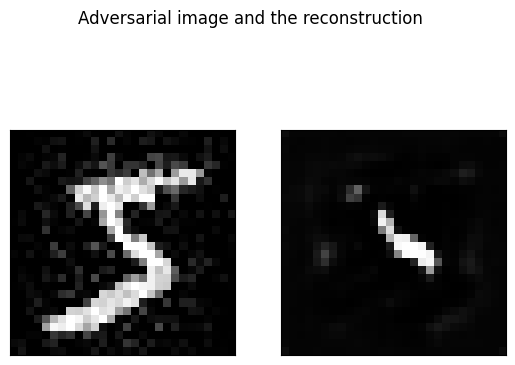

VAE (0.3394671678543091, 7.679447140387898, 0.3448817729949951)


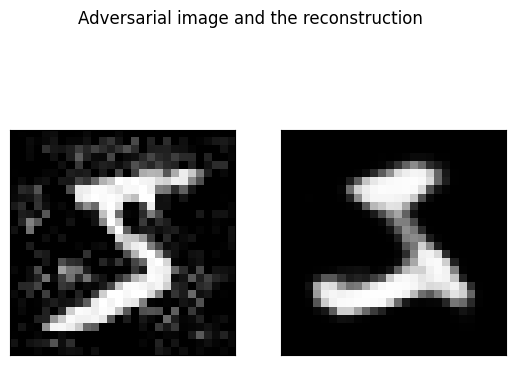

genRKM (0.28340771794319153, 7.851874667736047, 0.34103620052337646)


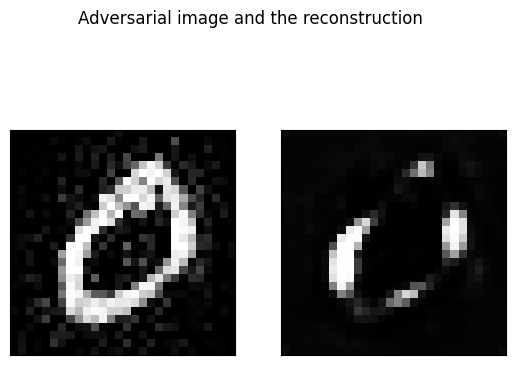

VAE (0.2375580370426178, 7.242246948602754, 0.5170365571975708)


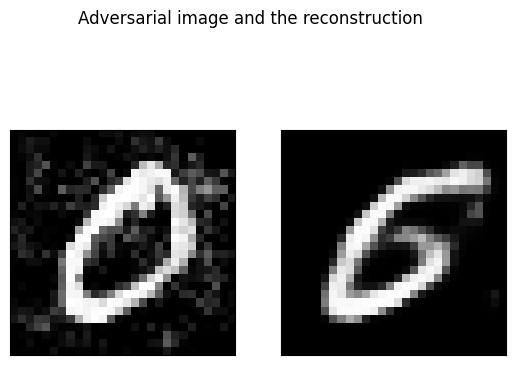

genRKM (0.5042005181312561, 7.356098976735556, 0.15073755383491516)


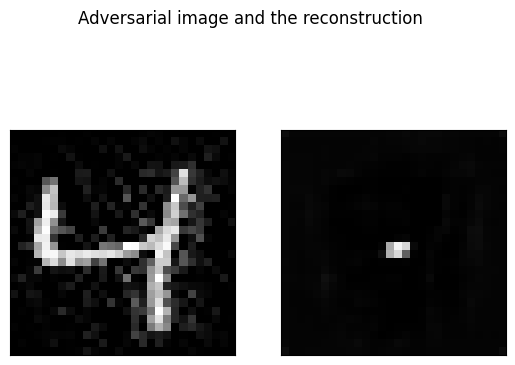

VAE (0.45552462339401245, 8.244910187649834, 0.301752507686615)


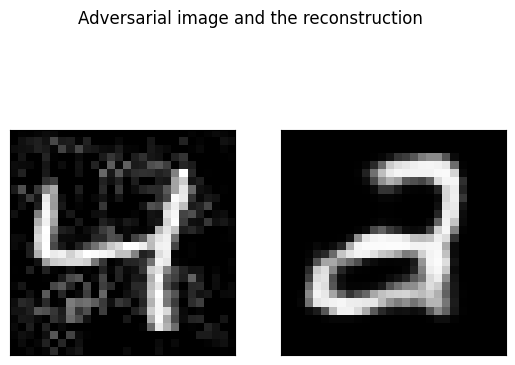

genRKM (0.3852735459804535, 7.232153181468642, 0.07731390744447708)


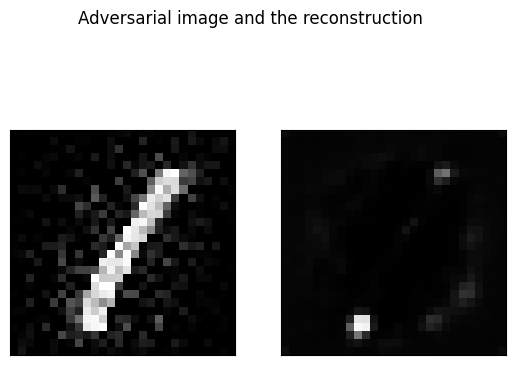

VAE (0.3376038074493408, 9.141746951237907, 0.05641050264239311)


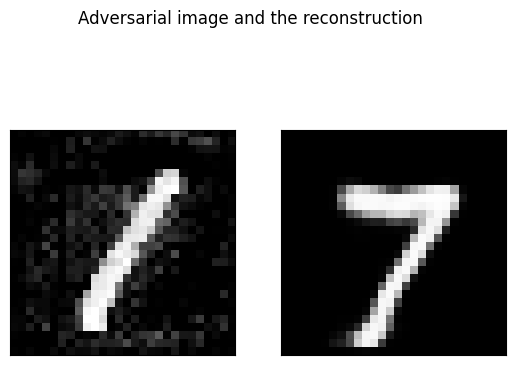

genRKM (0.31635957956314087, 7.477881493800398, 0.24361088871955872)


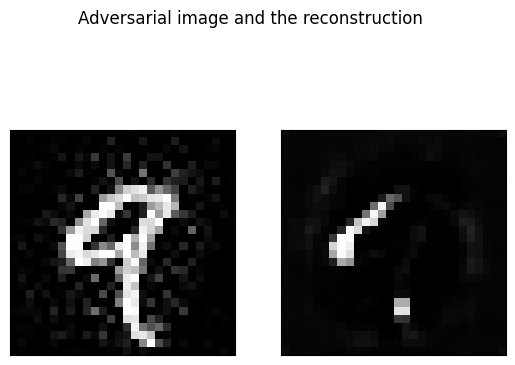

VAE (0.26451629400253296, 7.918073858114618, 0.3566194176673889)


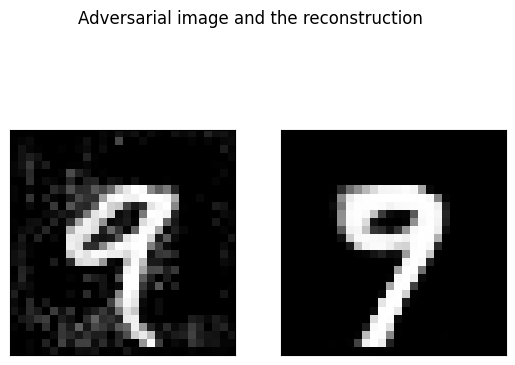

genRKM (0.35594403743743896, 8.324931056505552, 0.22388921678066254)


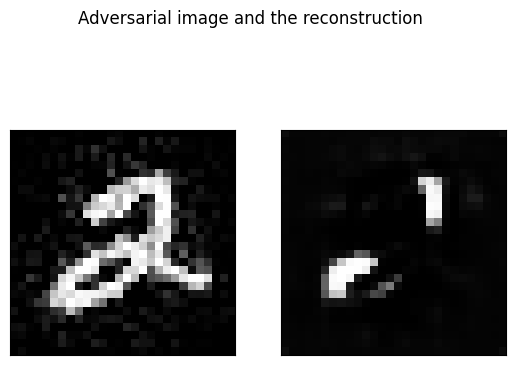

VAE (0.28046944737434387, 7.630319210701062, 0.3853851556777954)


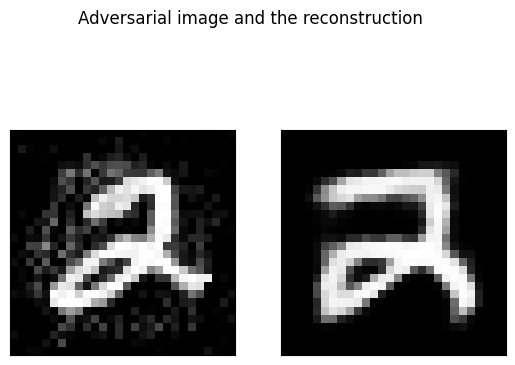

In [15]:
for image in range(6):
    attack_genRKM.adversarial_attack_lim(image, 3, 0.1, 0.1, False)
    attack_VAE.adversarial_attack_lim(image, 3, 0.1, 0.1, False)

    

    _, output_lpips_genRKM = attack_genRKM.get_lpips_arrays()
    _, output_distortion_genRKM = attack_genRKM.get_distortion_arrays()
    _, output_ssim_genRKM = attack_genRKM.get_ssim_arrays()
    _, output_lpips_VAE = attack_VAE.get_lpips_arrays()
    _, output_distortion_VAE = attack_VAE.get_distortion_arrays()
    _, output_ssim_VAE = attack_VAE.get_ssim_arrays()

    print(f"genRKM {output_lpips_genRKM[-1], output_distortion_genRKM[-1], output_ssim_genRKM[-1]}")
    

    attack_genRKM.plot_adv_back()

    print(f"VAE {output_lpips_VAE[-1], output_distortion_VAE[-1], output_ssim_VAE[-1]}")
    attack_VAE.plot_adv_back()


genRKM (0.3922136425971985, 8.974804185237177, 0.12658186256885529)


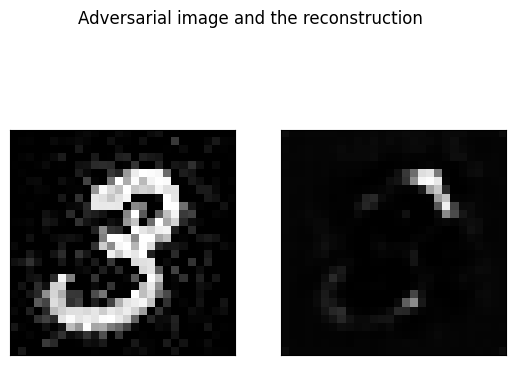

VAE (0.2354305386543274, 7.549382514826651, 0.36324766278266907)


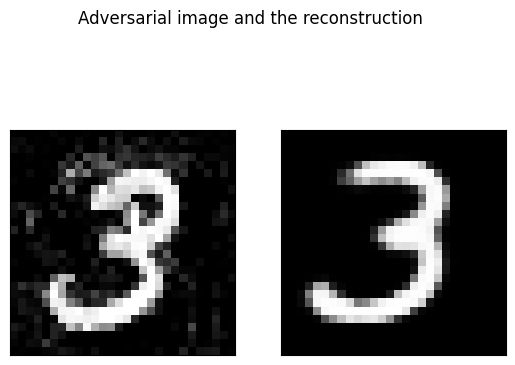

genRKM (0.38804638385772705, 8.346390201527905, 0.07555045932531357)


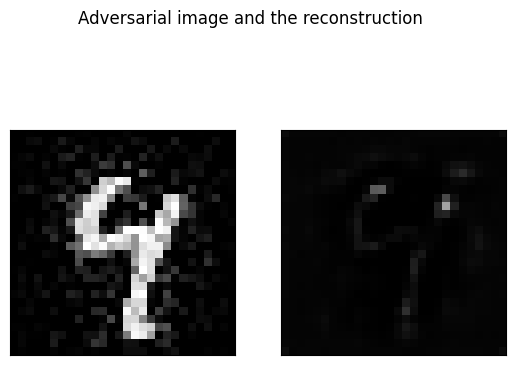

VAE (0.3191283643245697, 8.2551454854258, 0.308051735162735)


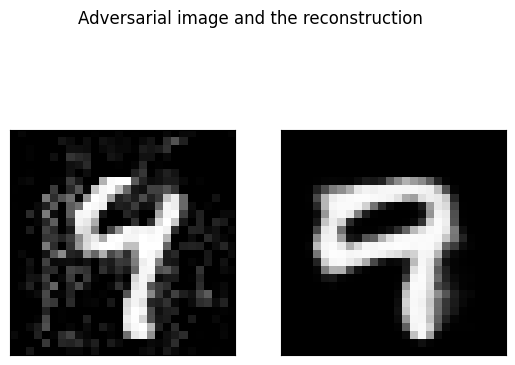

genRKM (0.4031669497489929, 8.124969043240675, 0.10573273152112961)


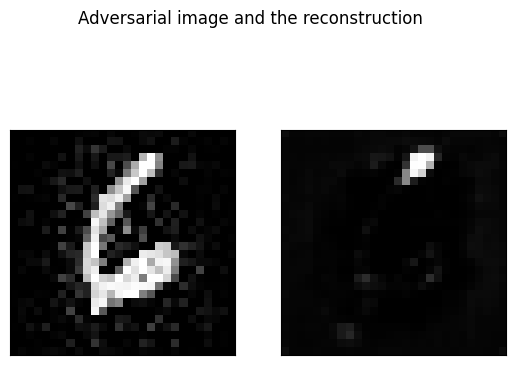

VAE (0.28163349628448486, 7.949131139998596, 0.2978293299674988)


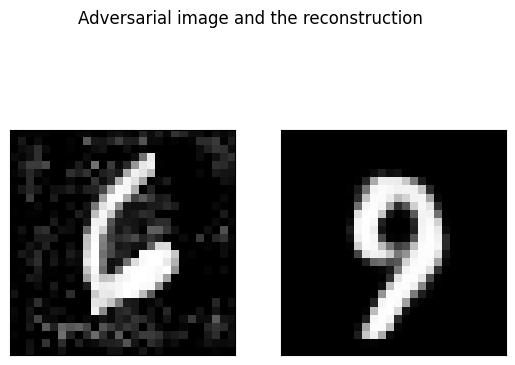

genRKM (0.4358659088611603, 6.493954360320895, 0.09569307416677475)


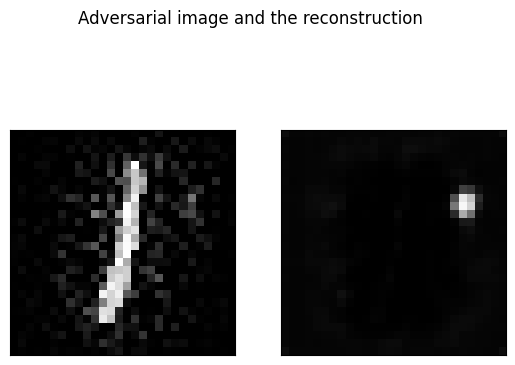

VAE (0.3128501772880554, 7.320473004660519, 0.15321315824985504)


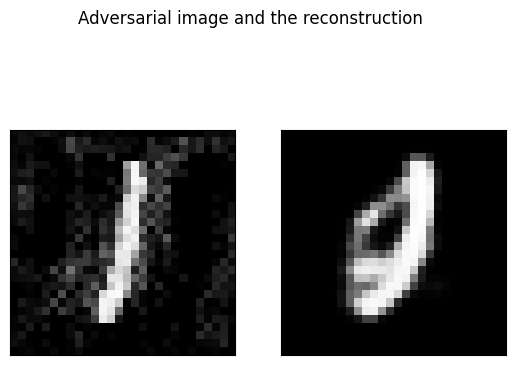

genRKM (0.35469505190849304, 9.058966598862812, 0.19625918567180634)


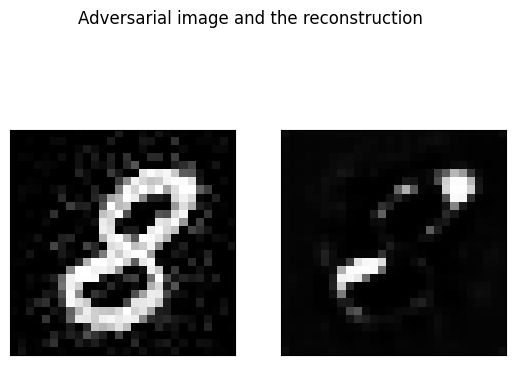

VAE (0.22976471483707428, 7.311638980943462, 0.4627113342285156)


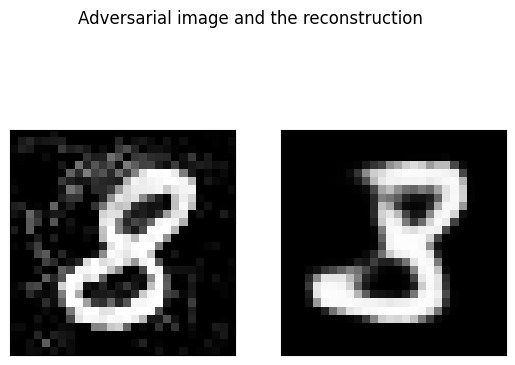

genRKM (0.3779548406600952, 7.17628397232795, 0.10092432796955109)


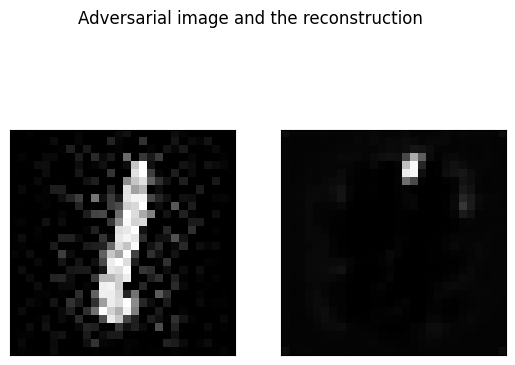

VAE (0.36841627955436707, 8.524663018087855, 0.0840185284614563)


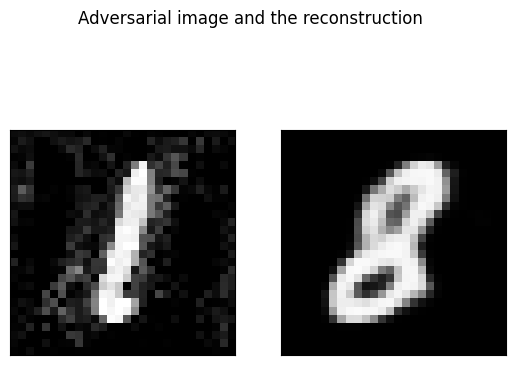

In [16]:
for image in range(6):
    attack_genRKM.adversarial_attack_lim(image+5001, 3, 0.1, 0.1, False)
    attack_VAE.adversarial_attack_lim(image+5001, 3, 0.1, 0.1, False)

    

    _, output_lpips_genRKM = attack_genRKM.get_lpips_arrays()
    _, output_distortion_genRKM = attack_genRKM.get_distortion_arrays()
    _, output_ssim_genRKM = attack_genRKM.get_ssim_arrays()
    _, output_lpips_VAE = attack_VAE.get_lpips_arrays()
    _, output_distortion_VAE = attack_VAE.get_distortion_arrays()
    _, output_ssim_VAE = attack_VAE.get_ssim_arrays()

    print(f"genRKM {output_lpips_genRKM[-1], output_distortion_genRKM[-1], output_ssim_genRKM[-1]}")
    

    attack_genRKM.plot_adv_back()

    print(f"VAE {output_lpips_VAE[-1], output_distortion_VAE[-1], output_ssim_VAE[-1]}")
    attack_VAE.plot_adv_back()

In [65]:
lpips_avg_VAE = []
lpips_avg_genRKM = []

lpips_std_dev_VAE = []
lpips_std_dev_genRKM = []

for element in reference_points:
    avg_VAE, std_VAE = average_and_std(element, distortion_input_VAE_set, lpips_output_VAE_set)
    avg_genRKM, std_genRKM = average_and_std(element,distortion_input_genRKM_set, lpips_output_genRKM_set)

    lpips_avg_VAE.append(avg_VAE)
    lpips_avg_genRKM.append(avg_genRKM)
    lpips_std_dev_VAE.append(std_VAE)
    lpips_std_dev_genRKM.append(std_genRKM) 

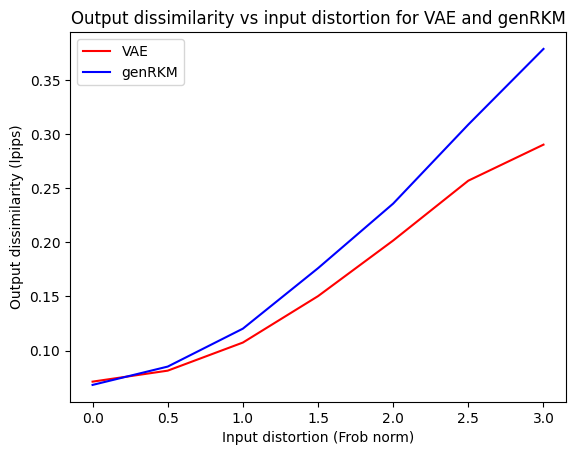

In [66]:
# Plot the curves
plt.plot(reference_points, lpips_avg_VAE, color='red', label='VAE')
plt.plot(reference_points, lpips_avg_genRKM, color='blue', label='genRKM')

# Add labels and legend
plt.xlabel('Input distortion (Frob norm)')
plt.ylabel('Output dissimilarity (lpips)')
plt.title('Output dissimilarity vs input distortion for VAE and genRKM')
plt.legend()

# Show plot
plt.show()

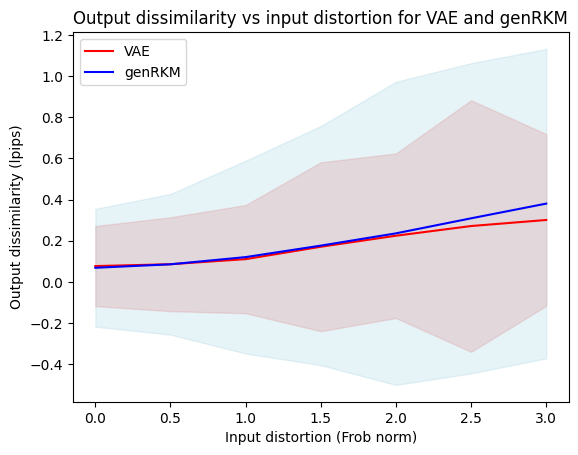

In [16]:
ci_VAE_upper = np.array(lpips_avg_VAE) + 1.96 * np.array(lpips_std_dev_VAE)
ci_VAE_lower = np.array(lpips_avg_VAE) - 1.96 * np.array(lpips_std_dev_VAE)
ci_genRKM_upper = np.array(lpips_avg_genRKM) + 1.96 * np.array(lpips_std_dev_genRKM)
ci_genRKM_lower = np.array(lpips_avg_genRKM) - 1.96 * np.array(lpips_std_dev_genRKM)

# Plot the curves
plt.plot(reference_points, lpips_avg_VAE, color='red', label='VAE')
plt.plot(reference_points, lpips_avg_genRKM, color='blue', label='genRKM')

# Plot the 95% confidence interval lines
plt.fill_between(reference_points, ci_VAE_upper, ci_VAE_lower, color='lightcoral', alpha=0.3)
plt.fill_between(reference_points, ci_genRKM_upper, ci_genRKM_lower, color='lightblue', alpha=0.3)

# Add labels and legend
plt.xlabel('Input distortion (Frob norm)')
plt.ylabel('Output dissimilarity (lpips)')
plt.title('Output dissimilarity vs input distortion for VAE and genRKM')
plt.legend(loc='upper left')

# Show plot
plt.show()

In [79]:
ssim_avg_VAE = []
ssim_avg_genRKM = []

ssim_std_dev_VAE = []
ssim_std_dev_genRKM = []

for element in reference_points:
    avg_VAE, std_VAE = average_and_std(element, distortion_input_VAE_set, ssim_output_VAE_set)
    avg_genRKM, std_genRKM = average_and_std(element,distortion_input_genRKM_set, ssim_output_genRKM_set)

    ssim_avg_VAE.append(avg_VAE)
    ssim_avg_genRKM.append(avg_genRKM)
    ssim_std_dev_VAE.append(std_VAE)
    ssim_std_dev_genRKM.append(std_genRKM) 

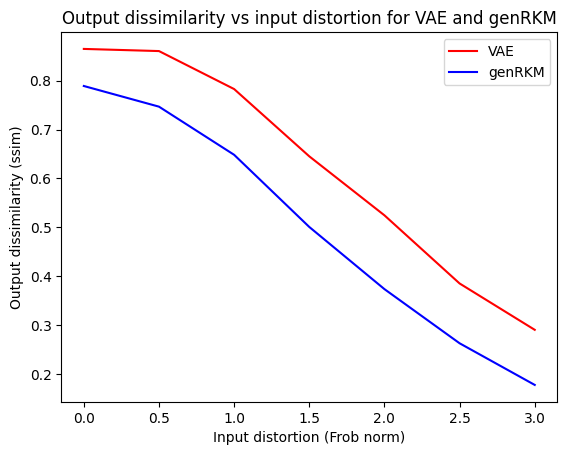

In [80]:
# Plot the curves
plt.plot(reference_points, ssim_avg_VAE, color='red', label='VAE')
plt.plot(reference_points, ssim_avg_genRKM, color='blue', label='genRKM')

# Add labels and legend
plt.xlabel('Input distortion (Frob norm)')
plt.ylabel('Output dissimilarity (ssim)')
plt.title('Output dissimilarity vs input distortion for VAE and genRKM')
plt.legend()

# Show plot
plt.show()